In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Caricamento del dataset
df = pd.read_csv('owid-covid-data.csv')

In [3]:
df['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [4]:
# Verifica dimensioni del dataset e metadati
print("Dimensioni del dataset:")
print(df.shape)
print("\nMetadati del dataset:")
print(df.info())

Dimensioni del dataset:
(387253, 67)

Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387253 entries, 0 to 387252
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387253 non-null  object 
 1   continent                                   368726 non-null  object 
 2   location                                    387253 non-null  object 
 3   date                                        387253 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths

In [5]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
# Maschera per escludere le locazioni senza continente
mask = df['continent'].notnull()

# Applicare la maschera per ottenere solo le righe con continente noto
df_filtered = df[mask]

# Calcolare il numero totale di casi per ogni continente
total_cases_per_continent = df_filtered.groupby('continent')['new_cases'].sum()

# Calcolare il numero totale di casi in tutto il mondo
total_world_cases = total_cases_per_continent.sum()

# Calcolare la percentuale dei casi per ciascun continente
percent_cases_per_continent = (total_cases_per_continent / total_world_cases) * 100

# Stampare i risultati
print("Numero totale di casi per continente:")
print(total_cases_per_continent)
print("\nPercentuale dei casi totali per continente:")
print(percent_cases_per_continent)


Numero totale di casi per continente:
continent
Africa            13141282.0
Asia             301446461.0
Europe           252376812.0
North America    124530643.0
Oceania           14808170.0
South America     68718448.0
Name: new_cases, dtype: float64

Percentuale dei casi totali per continente:
continent
Africa            1.695602
Asia             38.895223
Europe           32.563833
North America    16.068018
Oceania           1.910678
South America     8.866647
Name: new_cases, dtype: float64


In [7]:
#asi totali anche sulle locazioni senza indicazione di continente
casi_mondo = df['new_cases'].sum()

# Input degli utenti per i due continenti da confrontare
continente1 = input("Inserire il nome del primo continente: ")
continente2 = input("Inserire il nome del secondo continente: ")

dati_continente1 = df[(df['continent'] == continente1)]['new_cases']
dati_continente2 = df[(df['continent'] == continente2)]['new_cases']

max1 = dati_continente1.max()
media1 = dati_continente1.mean()
percentuale1 = dati_continente1.sum() / casi_mondo * 100

max2 = dati_continente2.max()
media2 = dati_continente2.mean()
percentuale2 = dati_continente2.sum() / casi_mondo * 100

print(f"\nConfronto descrittori statistici tra {continente1} e {continente2}:")
print(f"Valore massimo:\n{continente1}: {max1}\n{continente2}: {max2}")
print(f"\nMedia:\n{continente1}: {media1}\n{continente2}: {media2}")
print(f"\nPercentuale rispetto al mondo (%):\n{continente1}: {percentuale1:.2f}%\n{continente2}: {percentuale2:.2f}%")

Inserire il nome del primo continente:  Asia
Inserire il nome del secondo continente:  Europe



Confronto descrittori statistici tra Asia e Europe:
Valore massimo:
Asia: 40475477.0
Europe: 2417043.0

Media:
Asia: 4181.239489562383
Europe: 3257.736052665548

Percentuale rispetto al mondo (%):
Asia: 9.18%
Europe: 7.68%


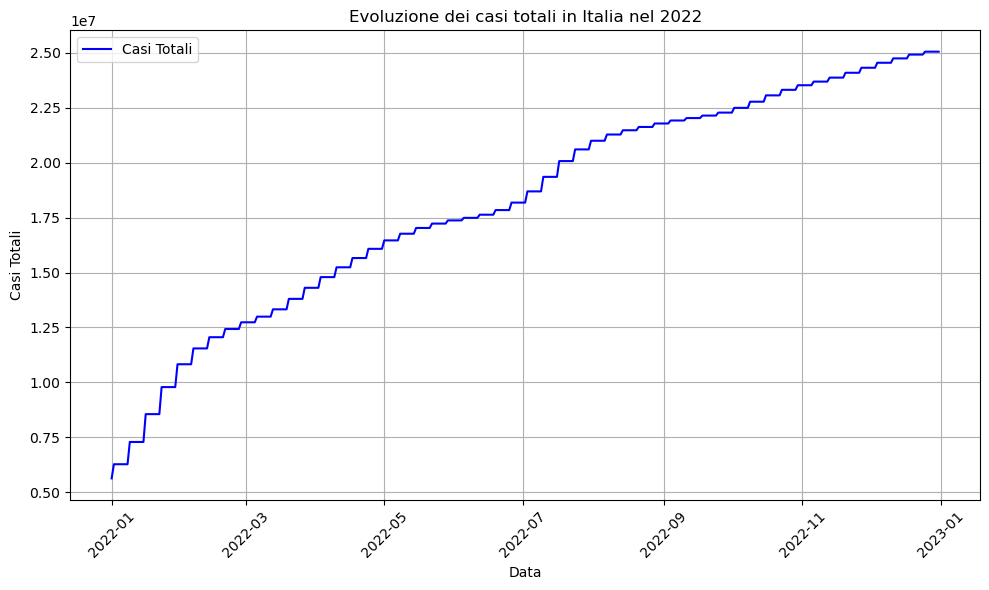

C:\Users\omara\AppData\Local\Temp\ipykernel_14780\2653030625.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_italia_2022['nuovi_casi'] = dati_italia_2022['new_cases'].diff()


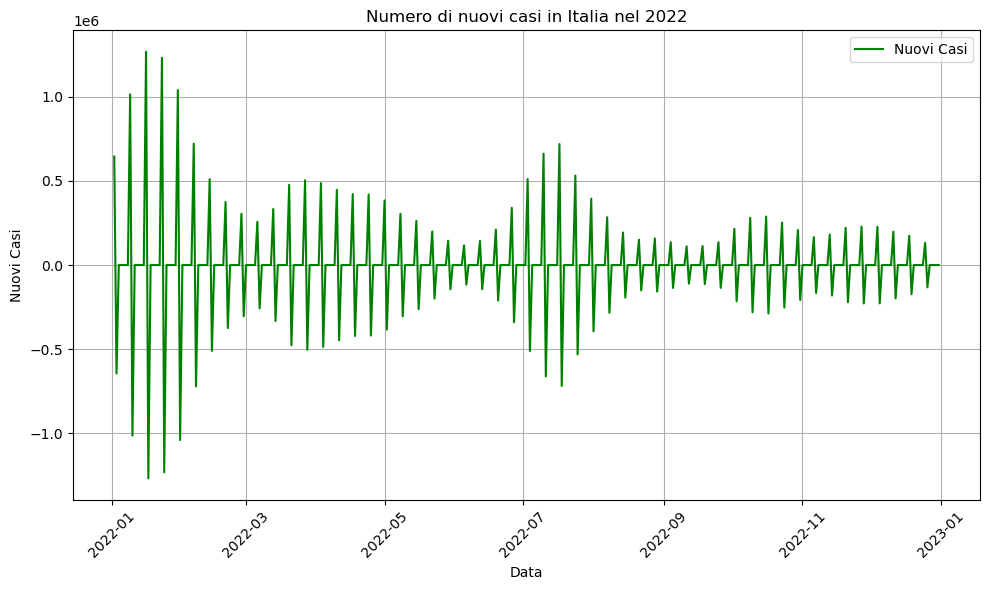

C:\Users\omara\AppData\Local\Temp\ipykernel_14780\2653030625.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_italia_2022['cumulativa_nuovi_casi'] = dati_italia_2022['nuovi_casi'].cumsum()


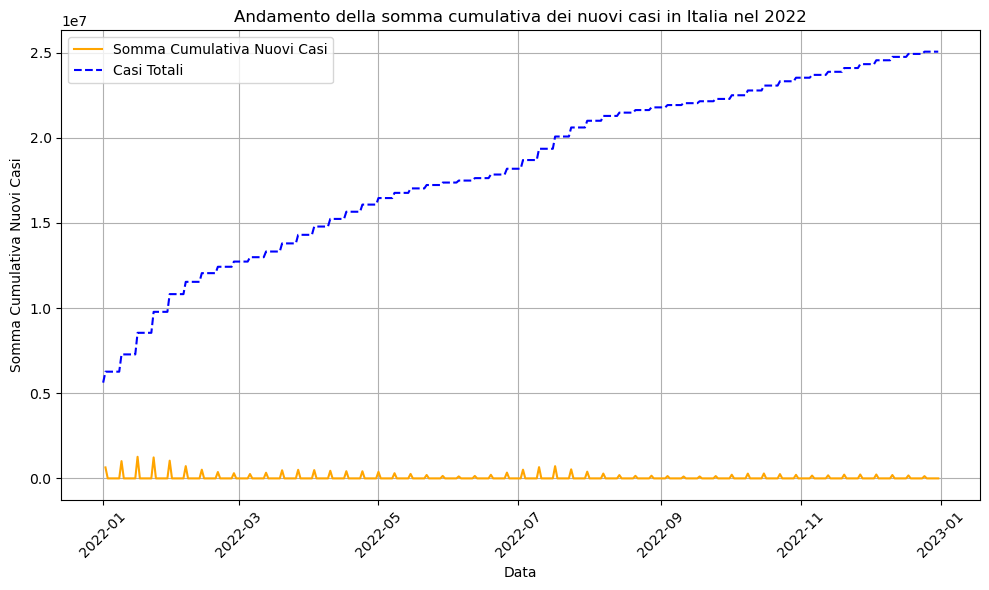

Commento sulle similarità tra somma cumulativa dei nuovi casi e casi totali:
Si osserva che l'andamento della somma cumulativa dei nuovi casi sembra seguire
l'andamento generale dei casi totali, con picchi e cali simili. Ciò indica che
le variazioni giornaliere dei nuovi casi influenzano direttamente l'incremento


In [8]:
df['date'] = pd.to_datetime(df['date'])
# Filtriamo i dati relativi all'Italia nel 2022
dati_italia_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]

# Creiamo il primo grafico: evoluzione dei casi totali rispetto alla data
plt.figure(figsize=(10, 6))
plt.plot(dati_italia_2022['date'], dati_italia_2022['total_cases'], label='Casi Totali', color='blue')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.title('Evoluzione dei casi totali in Italia nel 2022')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calcoliamo il numero di nuovi casi giornalieri
dati_italia_2022['nuovi_casi'] = dati_italia_2022['new_cases'].diff()

# Creiamo il secondo grafico: numero di nuovi casi rispetto alla data
plt.figure(figsize=(10, 6))
plt.plot(dati_italia_2022['date'], dati_italia_2022['nuovi_casi'], label='Nuovi Casi', color='green')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.title('Numero di nuovi casi in Italia nel 2022')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calcoliamo la somma cumulativa dei nuovi casi
dati_italia_2022['cumulativa_nuovi_casi'] = dati_italia_2022['nuovi_casi'].cumsum()

# Creiamo il terzo grafico: somma cumulativa dei nuovi casi rispetto alla data
plt.figure(figsize=(10, 6))
plt.plot(dati_italia_2022['date'], dati_italia_2022['cumulativa_nuovi_casi'], label='Somma Cumulativa Nuovi Casi', color='orange')
plt.plot(dati_italia_2022['date'], dati_italia_2022['total_cases'], label='Casi Totali', color='blue', linestyle='dashed')
plt.xlabel('Data')
plt.ylabel('Somma Cumulativa Nuovi Casi')
plt.title('Andamento della somma cumulativa dei nuovi casi in Italia nel 2022')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Commento sulle similarità tra somma cumulativa nuovi casi e casi totali
print("Commento sulle similarità tra somma cumulativa dei nuovi casi e casi totali:")
print("Si osserva che l'andamento della somma cumulativa dei nuovi casi sembra seguire")
print("l'andamento generale dei casi totali, con picchi e cali simili. Ciò indica che")
print("le variazioni giornaliere dei nuovi casi influenzano direttamente l'incremento")

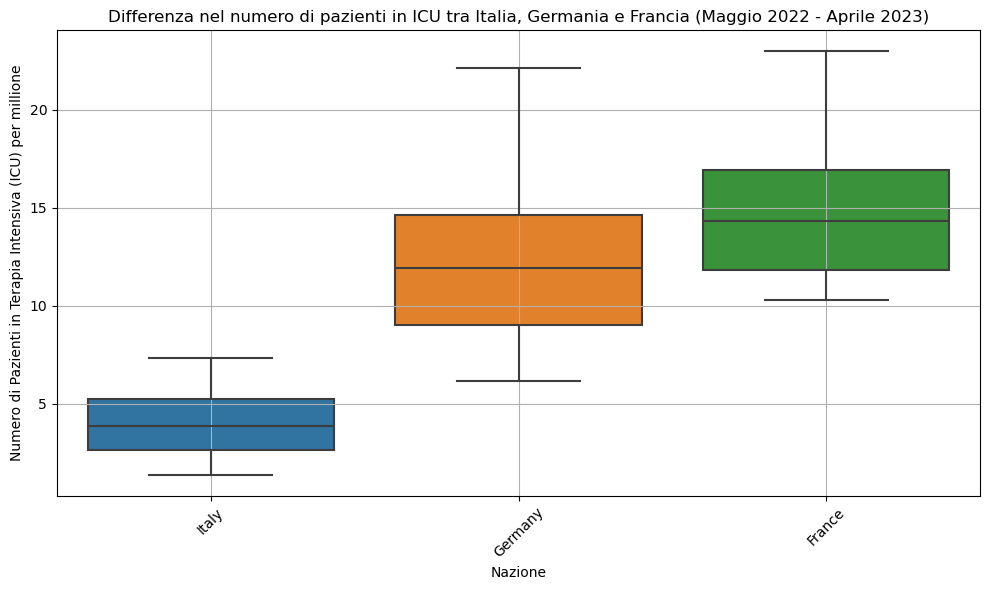

Media di Pazienti in Terapia Intensiva (ICU) nel periodo Maggio 2022 - Aprile 2023:
Italia: 3.92
Germania: 12.26
Francia: 14.72

Commento:
Dal boxplot e dalle medie calcolate, possiamo notare che Italia, Germania e Francia hanno avuto
una variazione significativa nel numero di pazienti in terapia intensiva (ICU) durante il periodo.
L'Italia sembra avere una variazione minore rispetto alla Germania e alla Francia, come indicato
da una minore dispersione dei dati nel boxplot e una media più bassa.


In [9]:

# Selezioniamo i dati per Italia, Germania e Francia nel periodo specificato
dati_italia = df[(df['location'] == 'Italy') & (df['date'].between('2022-05-01', '2023-04-30'))]
dati_germania = df[(df['location'] == 'Germany') & (df['date'].between('2022-05-01', '2023-04-30'))]
dati_francia = df[(df['location'] == 'France') & (df['date'].between('2022-05-01', '2023-04-30'))]

# Concateniamo i dati per creare un unico DataFrame per il boxplot
dati_boxplot = pd.concat([dati_italia, dati_germania, dati_francia])

# Creiamo il boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients_per_million', data=dati_boxplot)
plt.xlabel('Nazione')
plt.ylabel('Numero di Pazienti in Terapia Intensiva (ICU) per millione')
plt.title('Differenza nel numero di pazienti in ICU tra Italia, Germania e Francia (Maggio 2022 - Aprile 2023)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcoliamo le statistiche di base
italia_media_icu = dati_italia['icu_patients_per_million'].mean()
germania_media_icu = dati_germania['icu_patients_per_million'].mean()
francia_media_icu = dati_francia['icu_patients_per_million'].mean()

# Scriviamo un breve commento
print("Media di Pazienti in Terapia Intensiva (ICU) nel periodo Maggio 2022 - Aprile 2023:")
print(f"Italia: {italia_media_icu:.2f}")
print(f"Germania: {germania_media_icu:.2f}")
print(f"Francia: {francia_media_icu:.2f}")

print("\nCommento:")
print("Dal boxplot e dalle medie calcolate, possiamo notare che Italia, Germania e Francia hanno avuto")
print("una variazione significativa nel numero di pazienti in terapia intensiva (ICU) durante il periodo.")
print("L'Italia sembra avere una variazione minore rispetto alla Germania e alla Francia, come indicato")
print("da una minore dispersione dei dati nel boxplot e una media più bassa.")


In [10]:
# Selezioniamo i dati per Italia, Germania, Francia e Spagna nel 2023
dati_italia_2023 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2023)]
dati_germania_2023 = df[(df['location'] == 'Germany') & (df['date'].dt.year == 2023)]
dati_francia_2023 = df[(df['location'] == 'France') & (df['date'].dt.year == 2023)]
dati_spagna_2023 = df[(df['location'] == 'Spain') & (df['date'].dt.year == 2023)]

# Calcoliamo la somma dei pazienti ospitalizzati per ciascuna nazione utilizzando i dati per milione per avere un dato maggiormente equiparabile
sum_osp_italia = dati_italia_2023['weekly_hosp_admissions_per_million'].sum()
sum_osp_germania = dati_germania_2023['weekly_hosp_admissions_per_million'].sum()
sum_osp_francia = dati_francia_2023['weekly_hosp_admissions_per_million'].sum()
sum_osp_spagna = dati_spagna_2023['weekly_hosp_admissions_per_million'].sum()

# Gestione dei dati nulli
# Verifichiamo se ci sono dati nulli per ciascuna nazione
null_italia = dati_italia_2023['weekly_hosp_admissions_per_million'].isnull().sum()
null_germania = dati_germania_2023['weekly_hosp_admissions_per_million'].isnull().sum()
null_francia = dati_francia_2023['weekly_hosp_admissions_per_million'].isnull().sum()
null_spagna = dati_spagna_2023['weekly_hosp_admissions_per_million'].isnull().sum()

# Stampa della somma dei pazienti ospitalizzati per ogni nazione
print("Somma dei pazienti ospitalizzati nel 2023 per millione:")
print(f"Italia: {sum_osp_italia}")
print(f"Germania: {sum_osp_germania}")
print(f"Francia: {sum_osp_francia}")
print(f"Spagna: {sum_osp_spagna}")

# Stampa dei dati nulli
print("\nDati nulli nel 2023:")
print(f"Italia: {null_italia}")
print(f"Germania: {null_germania}")
print(f"Francia: {null_francia}")
print(f"Spagna: {null_spagna}")

# Gestione dei dati nulli tramite interpolazione
dati_italia_2023['weekly_hosp_admissions_per_million'].interpolate(method='linear', inplace=True)
dati_germania_2023['weekly_hosp_admissions_per_million'].interpolate(method='linear', inplace=True)
dati_francia_2023['weekly_hosp_admissions_per_million'].interpolate(method='linear', inplace=True)
dati_spagna_2023['weekly_hosp_admissions_per_million'].interpolate(method='linear', inplace=True)

# Calcoliamo nuovamente la somma dei pazienti ospitalizzati per ciascuna nazione dopo la sostituzione
sum_osp_italia_fillna = dati_italia_2023['weekly_hosp_admissions_per_million'].sum()
sum_osp_germania_fillna = dati_germania_2023['weekly_hosp_admissions_per_million'].sum()
sum_osp_francia_fillna = dati_francia_2023['weekly_hosp_admissions_per_million'].sum()
sum_osp_spagna_fillna = dati_spagna_2023['weekly_hosp_admissions_per_million'].sum()

# Stampa della somma dei pazienti ospitalizzati per ogni nazione dopo la sostituzione
print("\nSomma dei pazienti ospitalizzati nel 2023 per milione dopo la sostituzione dei dati nulli:")
print(f"Italia: {sum_osp_italia_fillna}")
print(f"Germania: {sum_osp_germania_fillna}")
print(f"Francia: {sum_osp_francia_fillna}")
print(f"Spagna: {sum_osp_spagna_fillna}")

Somma dei pazienti ospitalizzati nel 2023 per millione:
Italia: 10027.856
Germania: 10768.595
Francia: 3953.771
Spagna: 6296.7119999999995

Dati nulli nel 2023:
Italia: 0
Germania: 187
Francia: 275
Spagna: 203

Somma dei pazienti ospitalizzati nel 2023 per milione dopo la sostituzione dei dati nulli:
Italia: 10027.856
Germania: 11372.044
Francia: 15450.420999999995
Spagna: 12370.675


C:\Users\omara\AppData\Local\Temp\ipykernel_14780\1936436941.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_italia_2023['weekly_hosp_admissions_per_million'].interpolate(method='linear', inplace=True)
C:\Users\omara\AppData\Local\Temp\ipykernel_14780\1936436941.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_germania_2023['weekly_hosp_admissions_per_million'].interpolate(method='linear', inplace=True)
C:\Users\omara\AppData\Local\Temp\ipykernel_14780\1936436941.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht